# ReAct: Enhancing Decision-Making through Reasoning and Action




ReAct (Reasoning and Acting) is a groundbreaking technique that combines reasoning with task-specific actions, allowing models to interact dynamically with their environment. This integration enhances decision-making by maintaining situational awareness through the continuous updating of context with past actions and thoughts. The model generates task-aligned thoughts to guide logical decision-making, while real-time feedback refines understanding, reduces errors, and enhances transparency and reliability.



## Key Features of ReAct



- **Integration of Reasoning and Action**: Combines reasoning traces with actionable steps, enabling models to perform dynamic and context-aware decision-making.

- **Situational Awareness**: Maintains an updated context by incorporating past actions and thoughts, allowing for informed decision-making.

- **Task-Aligned Thoughts**: Generates thoughts that are specifically aligned with the tasks at hand, guiding the model's logical reasoning process.

- **Real-Time Feedback Mechanism**: Utilizes feedback from the environment to refine the model's understanding and improve its responses continuously.



## How ReAct Works


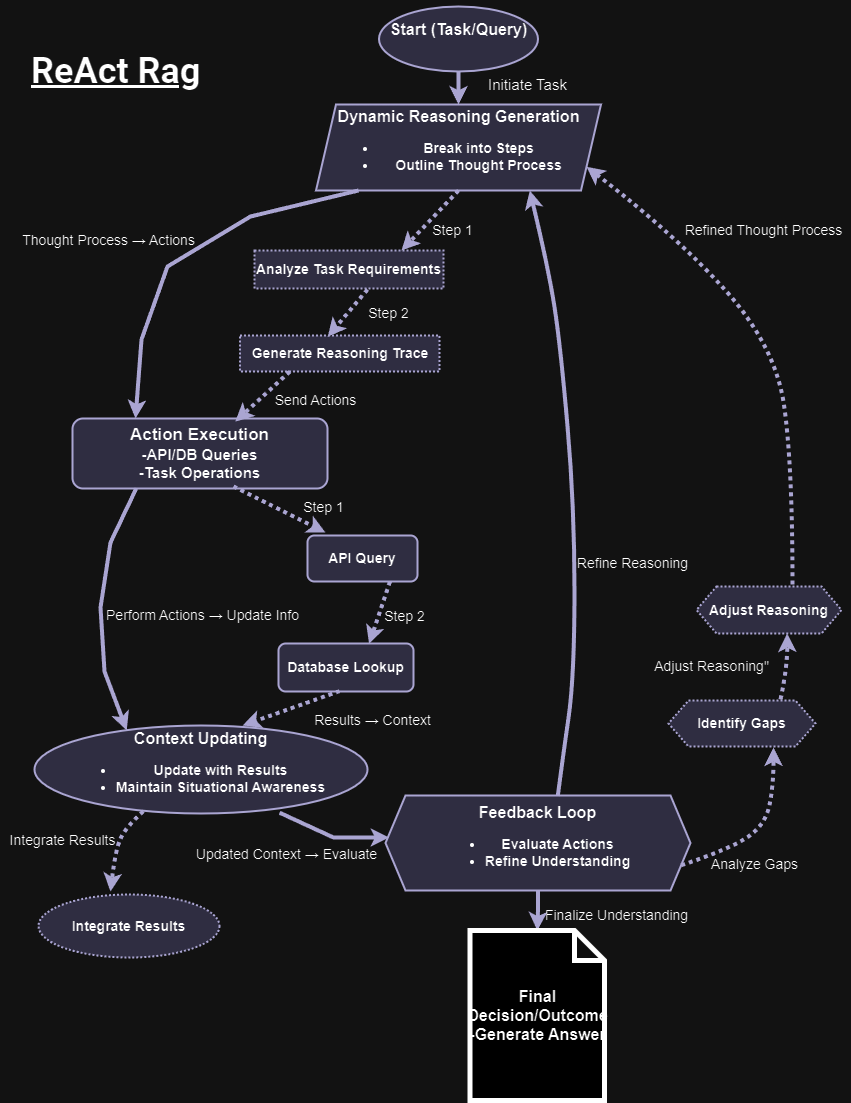


1. **Dynamic Reasoning Generation**: The model begins by generating reasoning traces that outline its thought process regarding the task at hand. This includes breaking down complex tasks into manageable steps.

2. **Action Execution**: Based on the generated reasoning traces, the model performs specific actions that may involve querying external databases or interacting with APIs to gather additional information necessary for decision-making.

3. **Context Updating**: As actions are executed, the model updates its internal context with new information gained from these interactions. This helps maintain situational awareness throughout the task.

4. **Feedback Loop**:
   - After executing actions, the model receives feedback from its environment.
   - This feedback is used to refine its understanding of the situation, allowing it to adjust its reasoning and subsequent actions accordingly.

5. **Iterative Process**: The reasoning and action steps are interleaved in an iterative manner, enabling the model to adapt dynamically based on real-time information and feedback.



In [ ]:
!pip install pypdf2 groq

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.6/232.6 kB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.8/108.8 kB 3.4 MB/s eta 0:00:00


In [ ]:
import os
import requests
from PyPDF2 import PdfReader
from groq import Groq
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
# Step 1: Initialize the Groq client
client = Groq(api_key="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")

In [ ]:
# Step 2: Download and process the PDF document
pdf_url = "https://arxiv.org/pdf/1810.04805.pdf"  # Example: BERT paper on Masked Language Models
pdf_path = "BERT_paper.pdf"

In [ ]:
response = requests.get(pdf_url)
with open(pdf_path, 'wb') as pdf_file:
    pdf_file.write(response.content)

In [ ]:
reader = PdfReader(pdf_path)
text = ""
for page in reader.pages:
    text += page.extract_text()

In [ ]:
# Step 3: Define the query
query = " Unsupervised Fine-tuning Approaches?"
evaluation_dataset = [
    {"query": query, "expected_output": "Information about Unsupervised Fine-tuning Approaches"}
]

In [ ]:
# Step 4: Chunk the document for processing
chunks = [text[i:i + 1000] for i in range(0, len(text), 1000)]  # Divide document into manageable chunks
vectorizer = TfidfVectorizer()
chunk_embeddings = vectorizer.fit_transform(chunks)
query_embedding = vectorizer.transform([query])

In [ ]:
# Step 5: Retrieve relevant chunks using cosine similarity
similarities = cosine_similarity(query_embedding, chunk_embeddings).flatten()
top_k = 5  # Retrieve the top 5 most relevant chunks
retrieved_chunk_indices = similarities.argsort()[-top_k:][::-1]
retrieved_chunks = [chunks[i] for i in retrieved_chunk_indices]

In [ ]:
# Display retrieved chunks
print(f"Top retrieved chunks for query '{query}':\n")
for idx, chunk in enumerate(retrieved_chunks, start=1):
    print(f"Chunk {idx}: {chunk[:200]}...\n")  # Display first 200 characters of each chunk

Top retrieved chunks for query ' Unsupervised Fine-tuning Approaches?':

Chunk 1: ft representations.
When integrating contextual word embeddings
with existing task-speciﬁc architectures, ELMo
advances the state of the art for several major NLP
benchmarks (Peters et al., 2018a) inc...

Chunk 2: -art performance on a large suite
of sentence-level andtoken-level tasks, outper-
forming many task-speciﬁc architectures.
• BERT advances the state of the art for eleven
NLP tasks. The code and pre-t...

Chunk 3:  are two existing strategies for apply-
ing pre-trained language representations to down-
stream tasks: feature-based andﬁne-tuning . The
feature-based approach, such as ELMo (Peters
et al., 2018a), u...

Chunk 4: .3 Fine-tuning Procedure
For ﬁne-tuning, most model hyperparameters are
the same as in pre-training, with the exception of
the batch size, learning rate, and number of train-
ing epochs. The dropout p...

Chunk 5: blation
study to evaluate the effect of different masking
stra

In [ ]:
# Step 6: ReAct Process - Dynamic reasoning generation and iterative retrieval
module_results = []
for chunk in retrieved_chunks:
    try:
        # Step 6.1: Reasoning Generation (Dynamic)
        reasoning_trace = f"Reasoning about the query '{query}': Based on my understanding of the query, I think it relates to concepts such as Unsupervised Fine-tuning Approaches."

        # Step 6.2: Document retrieval based on reasoning (Action Execution)
        combined_input = f"Query: {query}\nReasoning: {reasoning_trace}\nRelevant information: {chunk}"

        # Send the combined input to the Groq API for generating the final answer
        response = client.chat.completions.create(
            messages=[
                {"role": "system", "content": "You are a highly knowledgeable assistant."},
                {"role": "user", "content": combined_input},
            ],
            model="llama3-8b-8192",  # Model selection
        )

        answer = response.choices[0].message.content
        module_results.append({"chunk": chunk[:200], "answer": answer})  # Store chunk and answer
        print(f"Generated answer: {answer}")

    except Exception as e:
        print(f"Error generating answer: {e}")

Generated answer: Based on your query 'Unsupervised Fine-tuning Approaches', I'll provide an overview of popular unsupervised fine-tuning approaches for integrating contextual word embeddings with existing task-specific architectures in Natural Language Processing (NLP). 

**Traditional Approaches:**

1. **Word Embeddings (Collobert and Weston, 2008)**: Pre-trained word embedding parameters from unlabeled text, which can be fine-tuned on a specific task.

**Contextual Representation Learning Approaches:**

1. **ELMo (Peters et al., 2018a)**: Advances the state-of-the-art for several NLP benchmarks by integrating contextual word embeddings with task-specific architectures.
2. **Contextual Representations through a Task (Melamud et al., 2016)**: Learns contextual representations through a task to predict a single word from both left and right context using LSTMs.
3. **Cloze Task (Fedus et al., 2018)**: Uses the cloze task to improve the robustness of text generation models.

**Recent App

In [ ]:
# Step 7: Find the best result based on the reasoning and retrieved chunk
best_result = max(module_results, key=lambda x: len(x["answer"]))  # Select result with the longest answer
print("\nBest result based on module evaluation:")
print(f"Chunk: {best_result['chunk']}\nAnswer: {best_result['answer']}")


Best result based on module evaluation:
Chunk: -art performance on a large suite
of sentence-level andtoken-level tasks, outper-
forming many task-speciﬁc architectures.
• BERT advances the state of the art for eleven
NLP tasks. The code and pre-t
Answer: Unsupervised fine-tuning approaches refer to techniques that enable a pre-trained language model, such as BERT, to adapt to a specific downstream task without human-annotated labels. This is in contrast to traditional supervised fine-tuning, where a model is trained on labeled data to perform a specific task.

Some popular unsupervised fine-tuning approaches include:

1. Masked Language Modeling (MLM): This method involves randomly masking some of the input tokens and predicting their original form. This task encourages the model to learn context-dependent representations of words.
2. Next Sentence Prediction (NSP): This task involves predicting whether two consecutive sentences are related or not. This task helps the model learn to 

1. **Download and Process the PDF Document**  
   The PDF document is downloaded from the provided URL using the requests library and then read using PyPDF2.PdfReader. The extracted text from all pages is stored for further processing.

2. **Define the Query**  
   The query "Unsupervised Fine-tuning Approaches" is defined, guiding the retrieval and reasoning process in the next steps.

3. **Chunk the Document for Processing**  
   The document text is split into smaller chunks of 1000 characters, making the content more manageable for retrieval.

4. **Document Retrieval with Cosine Similarity**  
   TF-IDF vectorization is used to convert the document chunks and the query into numerical vectors. The cosine similarity between the query and document chunks is calculated to determine the relevance of each chunk.  
   The top 5 most relevant chunks are retrieved based on the similarity scores.

5. **ReAct RAG Process**  
   For each relevant chunk, the query and the chunk are combined into a new input format, and sent to the Groq API for generating the final response.  
   The response is stored in module_results along with the corresponding chunk.

6. **Best Result Selection**  
   The best result is selected based on the length of the generated response, assuming that the more detailed answer is likely to be more relevant and informative.  
   The chunk and corresponding answer are displayed as the final output.

## Applications of ReAct



- **Interactive Decision-Making**: Suitable for environments requiring complex interactions over extended periods, such as virtual assistants or customer service bots that need to manage multiple queries simultaneously.

- **Question Answering Systems**: Enhances systems like HotPotQA by interacting with external knowledge bases (e.g., Wikipedia) to provide accurate answers grounded in retrieved data.

- **Fact Verification Tasks**: Utilizes external databases to verify claims against factual information, ensuring accuracy in responses provided by the model.

- **Robotics and Automation**: Can be applied in robotic systems where real-time decision-making is critical based on environmental feedback and task requirements.


## Advantages of ReAct



- **Enhanced Task Performance**: By synergizing reasoning and acting, ReAct allows models to develop, maintain, and adjust high-level action plans, improving performance on complex tasks.

- **Improved Interpretability**: The reasoning traces provide insight into the model's thought process, making it easier for humans to understand and trust its decisions.

- **Error Mitigation**: Reduces issues like hallucinations (where the model generates incorrect or nonsensical information) by grounding its reasoning in data from external sources.

- **Adaptability**: The framework is adaptable across various domains, making it suitable for a wide range of applications.



## Limitations of ReAct



- **Complexity in Implementation**: Integrating reasoning and acting within a single framework can increase system complexity, requiring careful design and management.

- **Dependence on External Knowledge**: The effectiveness of ReAct relies on access to reliable external information sources; inaccuracies in these sources can lead to flawed reasoning.

- **Resource Intensive**: The need for real-time feedback and continuous updating may require significant computational resources, particularly for complex tasks.




## Conclusion



ReAct represents a significant advancement in integrating reasoning with actionable capabilities within language models. By maintaining situational awareness through continuous context updates and leveraging real-time feedback, ReAct enhances both transparency and reliability in decision-making processes. This innovative approach not only improves task performance but also fosters greater trust in AI systems by making their reasoning processes more interpretable.



Having explored ReAct, we will now move on to REPLUG (Retrieval Plugin).